 L'apport principal de la bibliothèque Pandas est les tableaux. Mais tout comme Numy offre les tables et de nombreuses
 méthodes permettant d'effectuer des calculs dessus, Pandas offre aussi quelques outils. Les principaux concernent :
 
 * la transformation des données
 * les statistiques
 * les graphique

In [2]:
import numpy as np
import pandas as pd

df1 = pd.DataFrame(np.random.randn(1000, 4),  # random variation everyday, an array of 1000 x 4
                   columns=['A', 'B', 'C', 'D'],
                   index=pd.date_range('1/1/2000', periods=1000))
df = df1.cumsum()  # cumulative sum to make something like a regular variation (temperature, stock...)
df1

,A,B,C,D
2000-01-01,-0.777040,-0.439417,0.500699,-0.443909
2000-01-02,-0.716773,0.515441,0.210738,1.067335
2000-01-03,0.350045,1.424557,0.154598,0.131809
2000-01-04,0.662500,0.087363,0.142677,0.251039
2000-01-05,2.898915,-0.060697,-0.959209,-0.515242
...,...,...,...,...
2002-09-22,0.228262,0.840628,0.480241,-1.227888
2002-09-23,-0.405359,-0.212327,0.074285,-1.582903
2002-09-24,-0.831407,-1.215173,0.780297,-1.919455
2002-09-25,-0.528293,1.324711,-0.286214,1.516202


In [3]:
df

,A,B,C,D
2000-01-01,-0.777040,-0.439417,0.500699,-0.443909
2000-01-02,-1.493813,0.076023,0.711437,0.623426
2000-01-03,-1.143768,1.500581,0.866035,0.755234
2000-01-04,-0.481269,1.587944,1.008711,1.006274
2000-01-05,2.417646,1.527247,0.049502,0.491031
...,...,...,...,...
2002-09-22,-26.461935,40.316931,-5.723216,93.210371
2002-09-23,-26.867294,40.104605,-5.648931,91.627468
2002-09-24,-27.698701,38.889431,-4.868635,89.708013
2002-09-25,-28.226994,40.214142,-5.154849,91.224215


Lorsqu'on veut voir un dataframe entièrement (sans les ...), il faut modifier ces variables
d'environnement de Pandas :

```
pd.options.display.max_columns = None
pd.options.display.max_rows = None
```

Bien sûr on peut mettre un nombre à la place de None.

## Modifier les données

On a vu qu'il est possible d'effectuer des opérations arithmétiques sur les tableaux et sur leurs colonnes comme
on le fait avec Numpy sur des tables.

In [4]:
df['M'] = (df.A + df.B + df.C + df.D) / 4   # ou  df['M'] = df.mean(axis=1)
df.head()

,A,B,C,D,M
2000-01-01,-0.777040,-0.439417,0.500699,-0.443909,-0.289917
2000-01-02,-1.493813,0.076023,0.711437,0.623426,-0.020732
2000-01-03,-1.143768,1.500581,0.866035,0.755234,0.494520
2000-01-04,-0.481269,1.587944,1.008711,1.006274,0.780415
2000-01-05,2.417646,1.527247,0.049502,0.491031,1.121357


Modifier une colonne revient à la mettre à gauche du signe égal : `df.A = df.A + 2`.

### Appliquer une fonction

On peut aussi appliquer une fonction vectorielle au tableau ce qui revient à l'appliquer a toutes ses colonnes
une par une (ou à toutes ses lignes avec `axis=1`).

In [5]:
df['M'] = df.apply(np.mean, axis=1)
df.head()

,A,B,C,D,M
2000-01-01,-0.777040,-0.439417,0.500699,-0.443909,-0.289917
2000-01-02,-1.493813,0.076023,0.711437,0.623426,-0.020732
2000-01-03,-1.143768,1.500581,0.866035,0.755234,0.494520
2000-01-04,-0.481269,1.587944,1.008711,1.006274,0.780415
2000-01-05,2.417646,1.527247,0.049502,0.491031,1.121357


In [6]:
def mean_deviation(w):
    try:
        return np.abs(w - w.mean()).mean()
    except:
        return np.nan
    
df.apply(mean_deviation)

A     9.108599
B    20.362365
C    14.920334
D    15.215274
M     4.464521
dtype: float64

# Exercice

In [16]:
presidents = pd.DataFrame([{"name":"president Obama", "#": 44},{"name":"president Trump", "#": 45}])
presidents

,name,#
0,president Obama,44
1,president Trump,45


In [17]:
# Enlevez le "president" de la colonne "name":


In [15]:
# résultat attendu

,name,#
0,Obama,44
1,Trump,45


## Statistiques d'un tableau

La méthode qui résume tout est `describe`.

In [18]:
df.describe()  # get statistics

,A,B,C,D,M
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-3.069217,26.989164,4.993900,38.656334,16.892545
std,11.401321,22.460869,16.716237,19.767783,5.703523
min,-31.520847,-9.602114,-24.560996,-0.695638,-0.289917
25%,-13.187474,2.129200,-10.764625,22.394872,13.812389
50%,-1.511499,31.534922,3.772648,38.641965,16.536514
75%,3.521336,48.329959,19.222440,49.366062,21.860792
max,22.227588,60.825593,40.376367,94.438259,26.741203


Plus en détail Pandas fournit ces méthodes que le lecteur pourra tester :

```
count()    Number of non-null observations
sum()      Sum of values
mean()     Mean of values
median()   Arithmetic median of values
min()      Minimum
max()      Maximum
std()      Bessel-corrected sample standard deviation
var()      Unbiased variance
skew()     Sample skewness (3rd moment)
kurt()     Sample kurtosis (4th moment)
quantile() Sample quantile (value at %)
cov()      Unbiased covariance (binary)
corr()     Correlation (binary)
```

In [19]:
df.quantile(0.1)

A   -17.755102
B    -2.778173
C   -14.753296
D    13.735719
M    10.576718
Name: 0.1, dtype: float64

#### Pandas profiling

Il existe aussi la bibliothèque [Pandas Profiling](https://github.com/pandas-profiling/pandas-profiling) pour faire
une analyse statistique plus complète d'un jeu de donnée (voir [cet exemple](https://nbviewer.jupyter.org/github/JosPolfliet/pandas-profiling/blob/master/examples/meteorites.ipynb)).

##  Graphiques

Les graphiques sont un outil primordial pour comprendre les données aussi le prochain chapitre est entièrement
consacré aux différentes bibliothèques qui permettent de faire de jolis graphiques.

En attendant Pandas intègre la fonction de tracé [`plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) qui est souvent suffisante.
Il n'est pas nécessaire de rentrer dans les détails de cette fonction pour l'instant. Elle fonctionne comme
la même fonction de la bibliothèque Matplotlib que l'on verra au prochain chapitre.

Note : sous Jupyter il est nécessaire d'indiquer `%matplotlib inline` pour que les graphiques s'affichent (à ne faire
qu'une fois par feuille). Si vous avez un écran en 4K voire moins utilisez le mode `retina` pour avoir un rendu
plus joli.

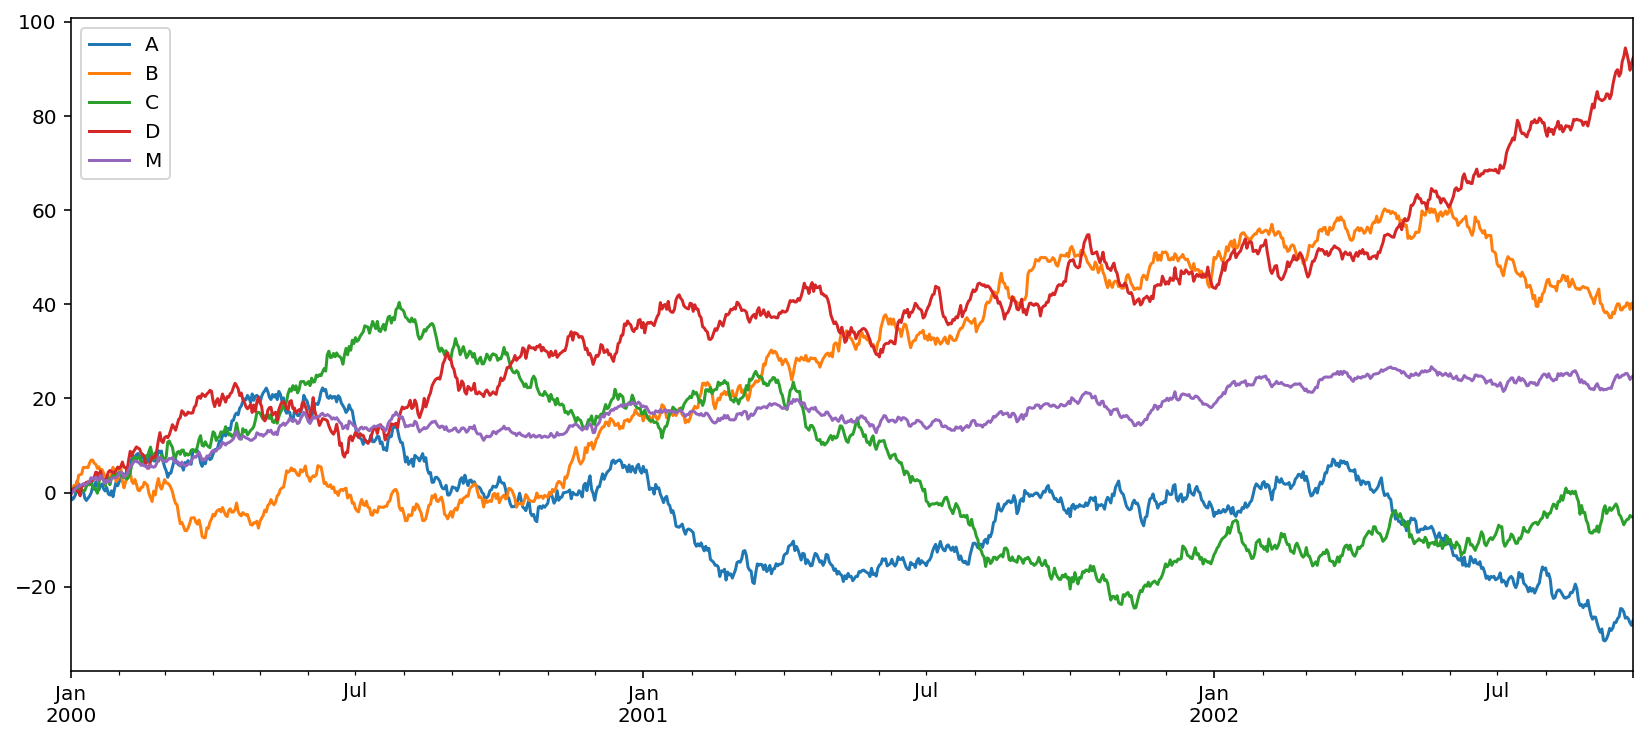

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

df.plot(figsize=(14,6))

### Fenêtre glissante

Un outil bien utile de Pandas pour préparer des données que l'on désire tracer est la fenêtre glissante sur laquelle
on applique une fonction de son choix (souvent la moyenne mais l'ensemble des fonctions
statistiques citées ci-dessus peuvent être utilisées).

La taille de la fenêtre est

* un entier qui indique le nombre de lignes choisies
* un intervalle temporel (seulement pour les tableaux chronologiques)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9aa64b5790>,
      dtype=object)

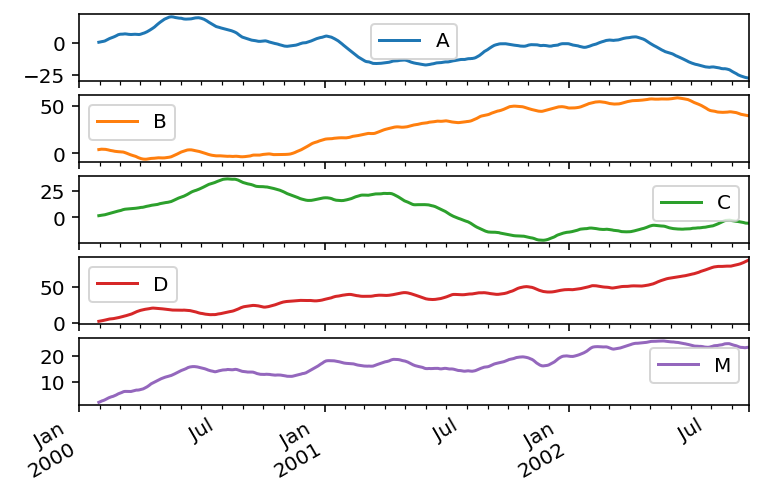

In [21]:
df.rolling(window=30).mean().plot(subplots=True)

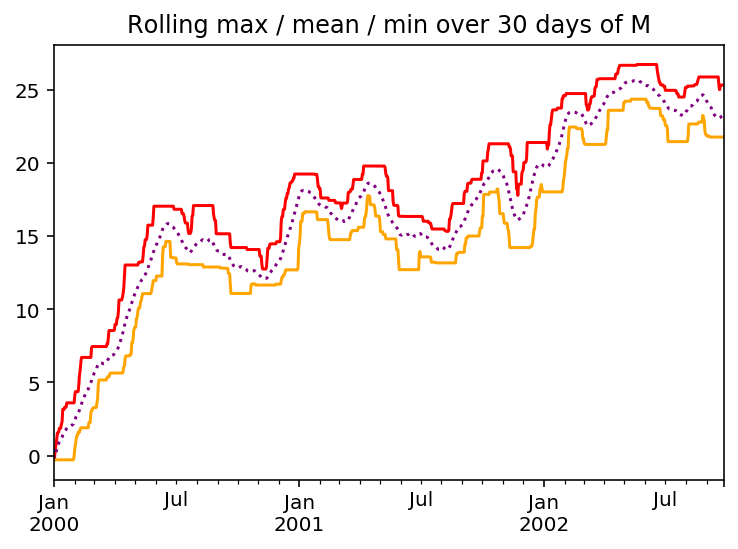

In [22]:
df['M'].rolling('30d').max().plot(color='red')
df['M'].rolling('30d').mean().plot(color='purple', style=':')
df['M'].rolling('30d').min().plot(title="Rolling max / mean / min over 30 days of M", color='orange')

On peut aussi faire des statistiques sur des fenêtres glissantes :

In [23]:
df.A.cov(df.A.rolling(window=30).mean())

121.73911771809321

{{ PreviousNext("pd07 -- Time dataframes.ipynb", "pd10 -- Getting data.ipynb")}}